In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 

# import regression tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

Regression tree is a model which accepts categorial data as inputs and predicts a numeric output.

In [2]:
#import train set
train = pd.read_excel("train.xlsx")
test = pd.read_excel("test.xlsx")

#Split sets into predictor and reponse sets
train_X = train.drop(columns = ['Job_ID','Salary','count'])
train_y = pd.DataFrame(train['Salary'])

test_X = test.drop(columns = ['Job_ID','Salary','count'])
test_y = pd.DataFrame(test['Salary'])

In [9]:
#create and fit regression tree
dectree = DecisionTreeRegressor()
dectree.fit(train_X, train_y)

# goodness of fit on train set
print('R^2(train): ', dectree.score(train_X, train_y))

R^2(train):  0.9952835984719816


[Text(825.5409051836699, 1279.5507692307692, 'Levels <= 1.5\nmse = 1140854963.451\nsamples = 964\nvalue = 150626.604'),
 Text(481.0672516974234, 1229.3723076923077, 'Title <= 1.5\nmse = 1307926686.717\nsamples = 486\nvalue = 140363.817'),
 Text(388.12806841922, 1179.1938461538462, 'Title <= 0.5\nmse = 594421596.99\nsamples = 288\nvalue = 128730.816'),
 Text(337.7313457520891, 1129.0153846153846, 'Scripting <= 0.5\nmse = 529581831.253\nsamples = 278\nvalue = 129960.701'),
 Text(256.8331650417827, 1078.836923076923, "Bachelor's degree <= 0.5\nmse = 407972272.058\nsamples = 272\nvalue = 130856.893"),
 Text(158.90306406685235, 1028.6584615384616, 'Doctoral degree <= 0.5\nmse = 281063315.215\nsamples = 159\nvalue = 135907.893'),
 Text(102.37771587743732, 978.48, 'C <= 0.5\nmse = 258130312.428\nsamples = 103\nvalue = 132547.136'),
 Text(83.72590529247911, 928.3015384615385, 'Master of Science <= 0.5\nmse = 211658224.852\nsamples = 65\nvalue = 128815.385'),
 Text(80.4100278551532, 878.1230769

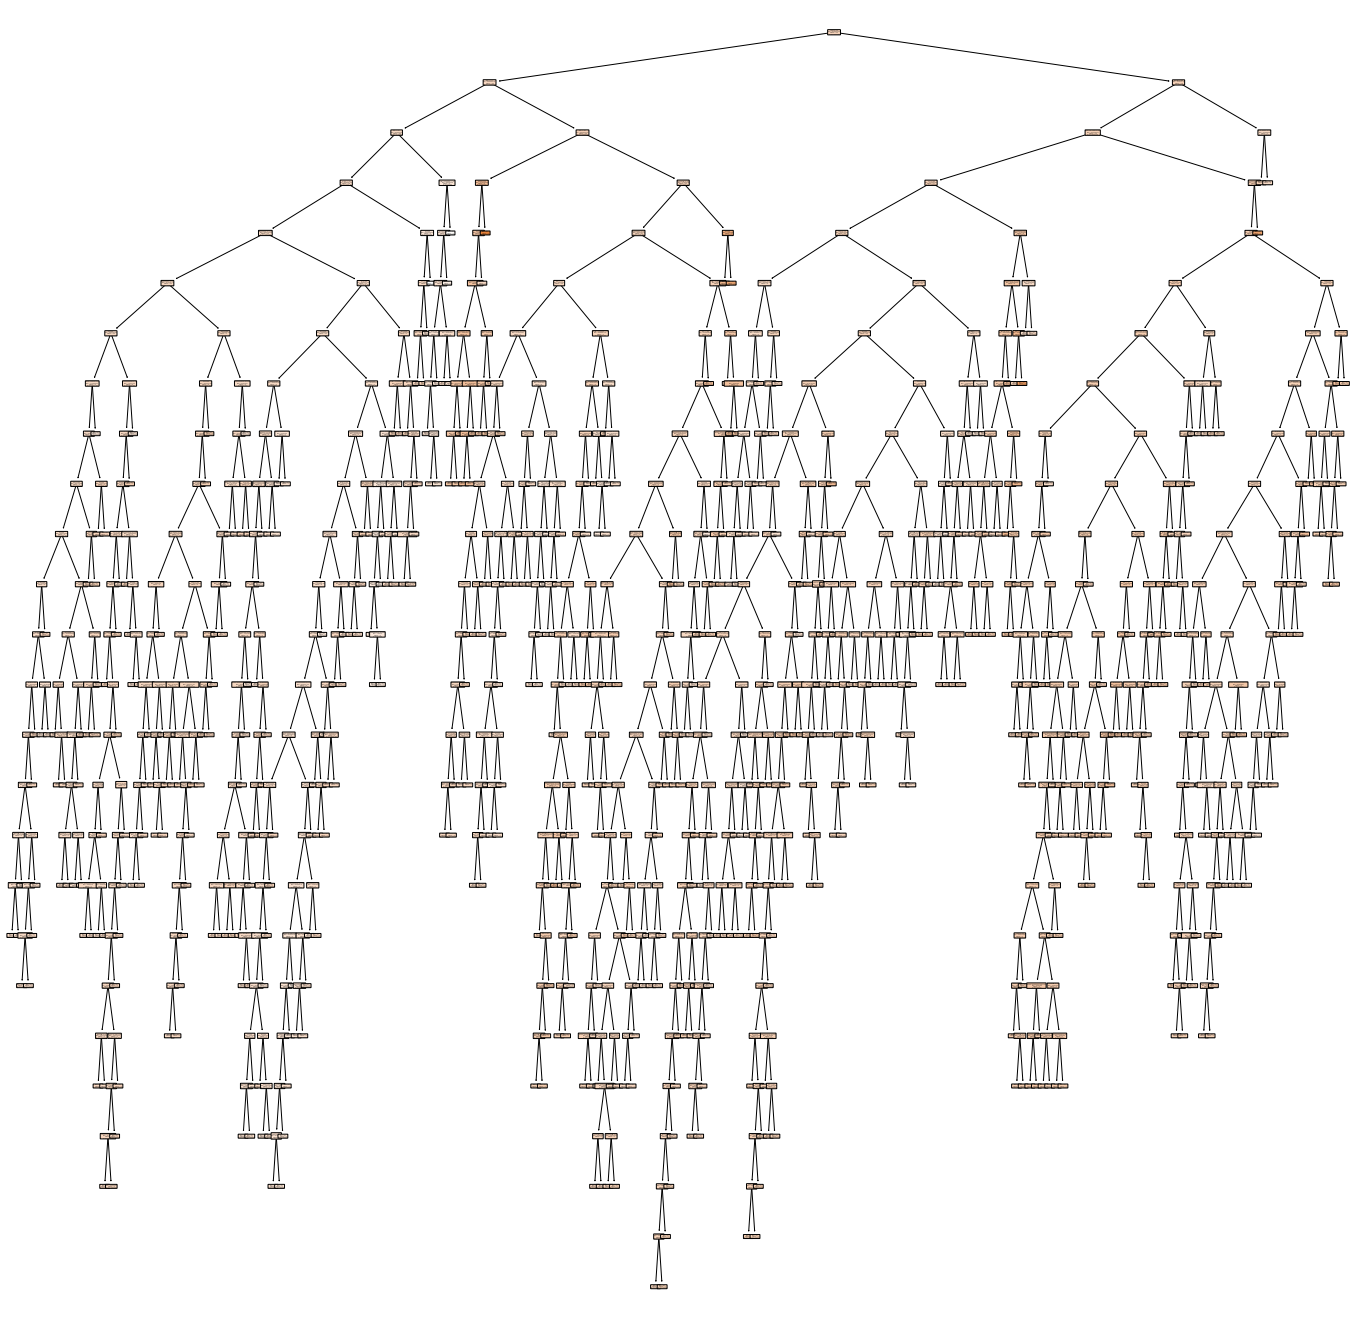

In [10]:
# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, 
          filled=True, 
          rounded=True,
          feature_names= test_X.columns)

In [11]:
# predict test_y
test_y_pred = dectree.predict(test_X)

# goodness of fit on test set
print('R^2(test): ', dectree.score(test_X, test_y))

R^2(test):  -0.21926061132513142


Poor fit to test data.

In [12]:
#evaluate prediction
mse = np.mean(np.square(np.array(test_y) - np.array(test_y_pred)))
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE) :", mse)
print("Root Mean Squared Error (RMSE) :", rmse)

Mean Squared Error (MSE) : 2823737927.6448994
Root Mean Squared Error (RMSE) : 53138.85515933608


In [8]:
test_y.describe()

,Salary
count,241.000000
mean,152442.244813
std,31733.971384
min,59000.000000
25%,130000.000000
50%,160000.000000
75%,170000.000000
max,434000.000000


Regression tree is not a good model for our dataset.
On average prediction deviates from actual value by ~1.67 SD (RMSE/SD).